# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Gemstone Dataset - Sanket Devakar</p>

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Importing all the libraries</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [4]:

df = pd.read_csv("data\gemstone.csv")
df.head()
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

### Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Drop unnamed column as it is statistically insignificant

In [6]:
df = df.drop(labels=['Unnamed: 0'],axis=1)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values in Dataset</p>

In [7]:
df.shape

(26967, 10)

In [8]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### There are 697 missing values in depth column

In [9]:
df['depth'].mode()[0]

np.float64(62.0)

In [10]:
# Replacing missing depth values with the mode
df['depth']= df['depth'].fillna(df['depth'].mode()[0])
df['depth'].isnull().sum()

np.int64(0)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicates in Dataset</p>

In [11]:
df.duplicated().sum()

np.int64(35)

### 34 duplicate records are found

In [12]:
# Deleting all the duplicate records
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(26932, 10)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

### Numerical and Categorical columns seperation

In [14]:
numerical_columns = list(df.columns[df.dtypes!='O'])
categorical_columns = list(df.columns[df.dtypes=='O'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


### Numerical Columns Description

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26932.0,0.798028,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26932.0,61.751868,1.394460,50.8,61.10,61.90,62.50,73.60
table,26932.0,57.456004,2.232180,49.0,56.00,57.00,59.00,79.00
x,26932.0,5.729393,1.127362,0.0,4.71,5.69,6.55,10.23
y,26932.0,5.733149,1.165033,0.0,4.71,5.70,6.54,58.90
z,26932.0,3.537798,0.719962,0.0,2.90,3.52,4.04,31.80
price,26932.0,3937.630959,4022.589747,326.0,945.00,2375.00,5356.00,18818.00


### Categorical Columns Description

In [16]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,26932,5,Ideal,10804
color,26932,7,G,5652
clarity,26932,8,SI1,6565


### All unique values in dataset

In [17]:
df.nunique()

carat       257
cut           5
color         7
clarity       8
depth       169
table       112
x           531
y           526
z           356
price      8742
dtype: int64

### Note that cut , color and clarity are ordinal features in dataset.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Univariate Analysis with Visualisation</p>

### Univariate Analysis of Numerical Variables

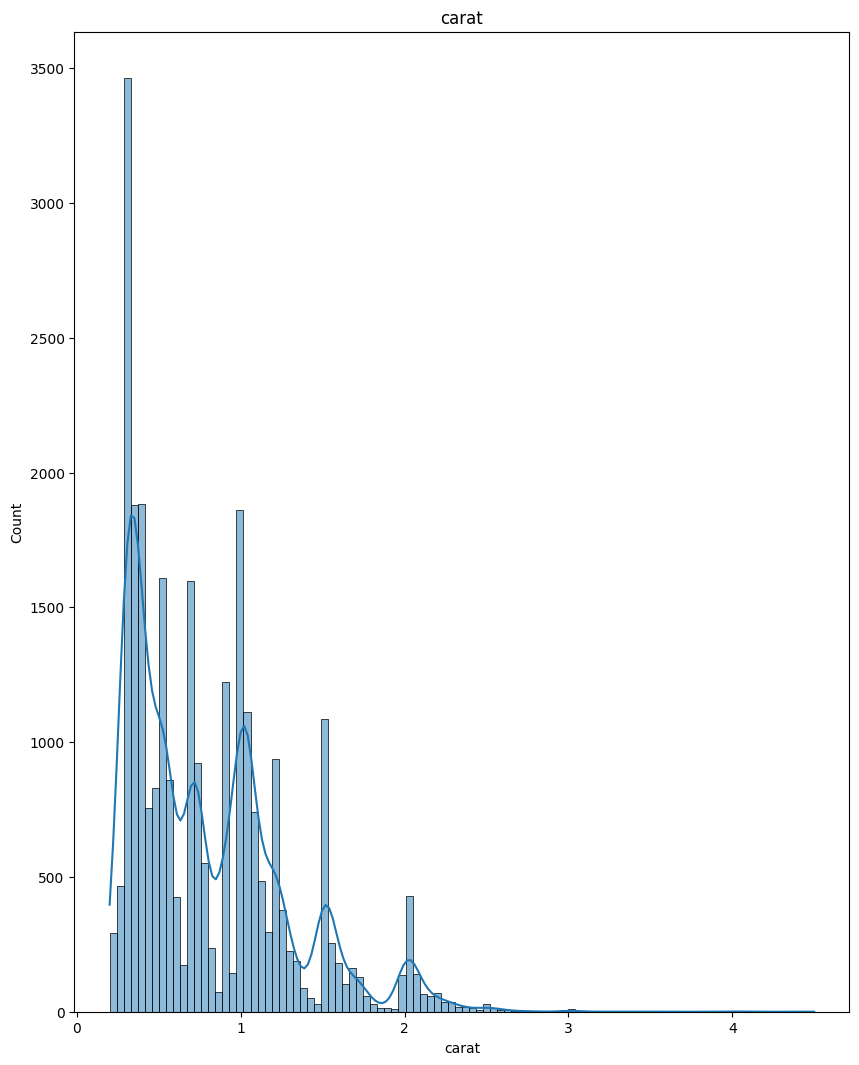

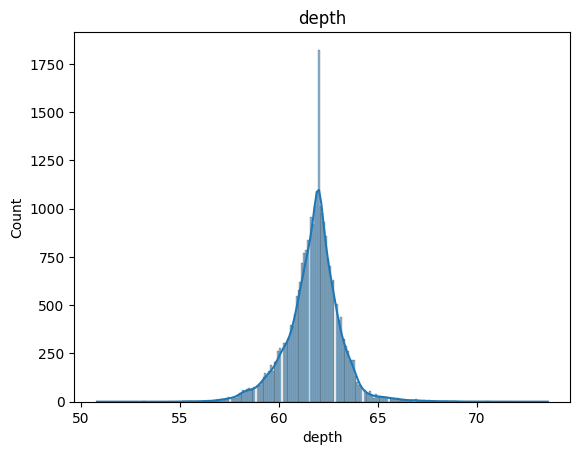

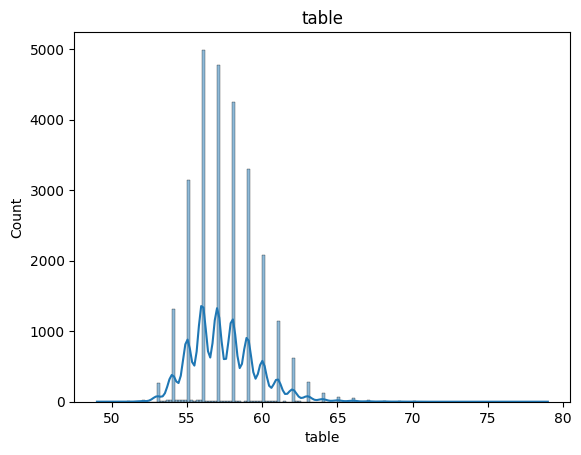

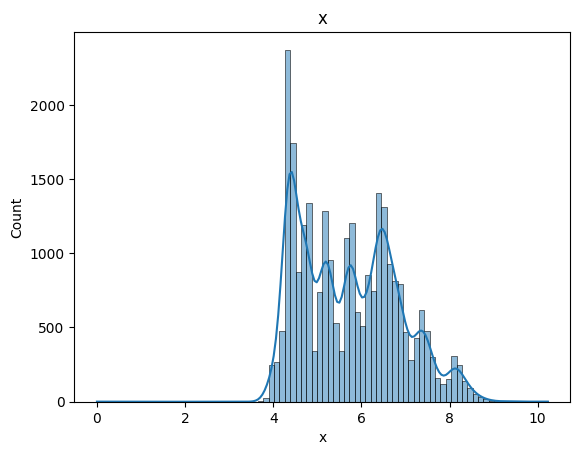

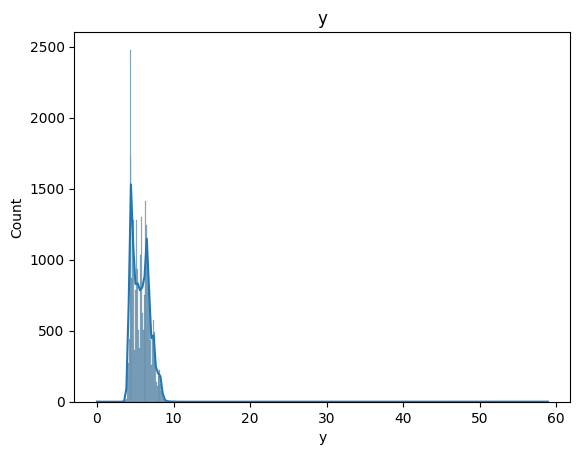

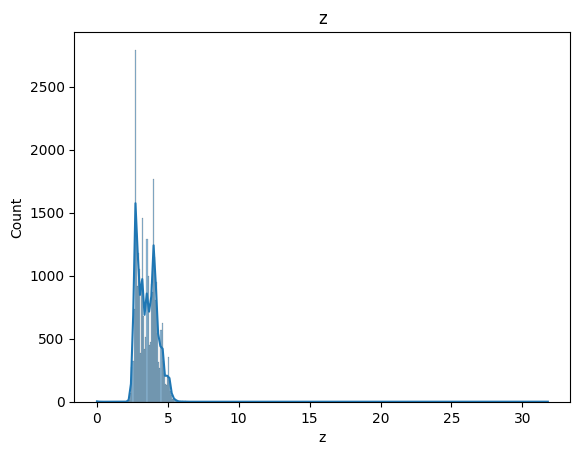

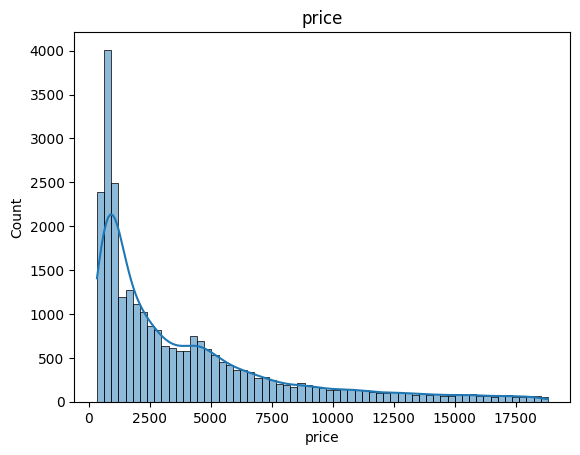

In [18]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

### Univariate analysis for categorical variables

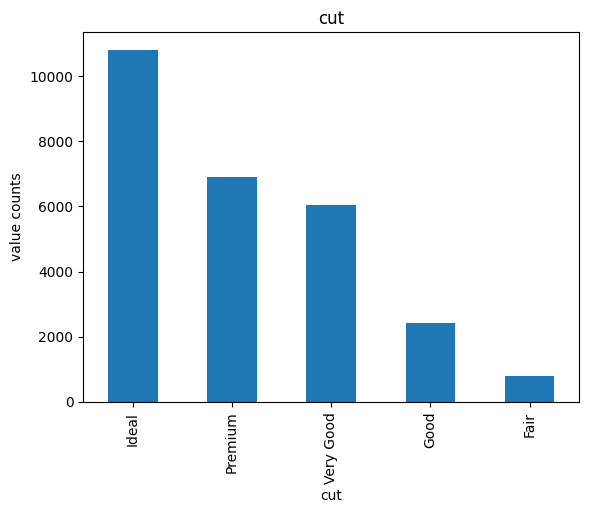

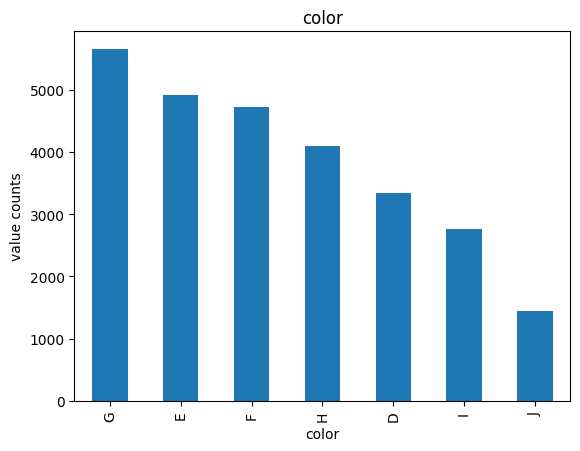

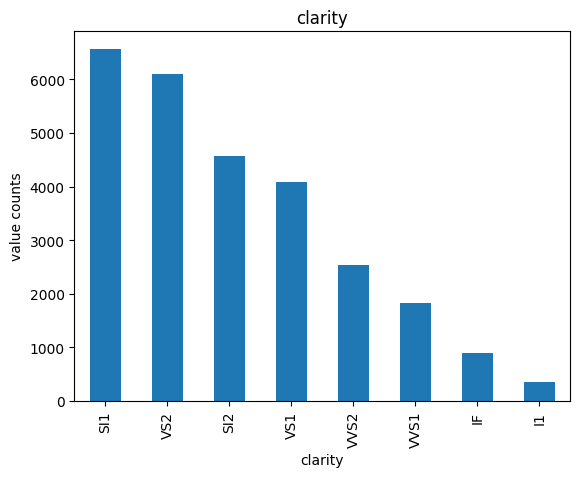

In [19]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Bivariate Analysis with Visualisation</p>

### Correlation heatmap

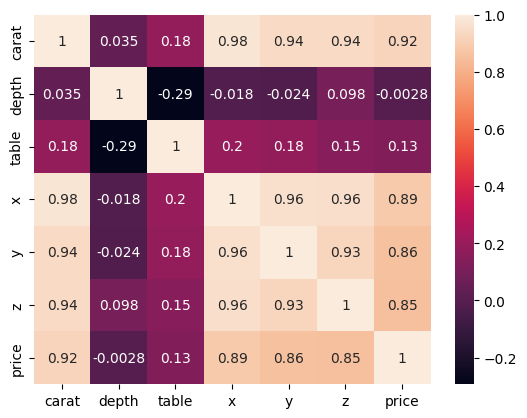

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### Pairplot

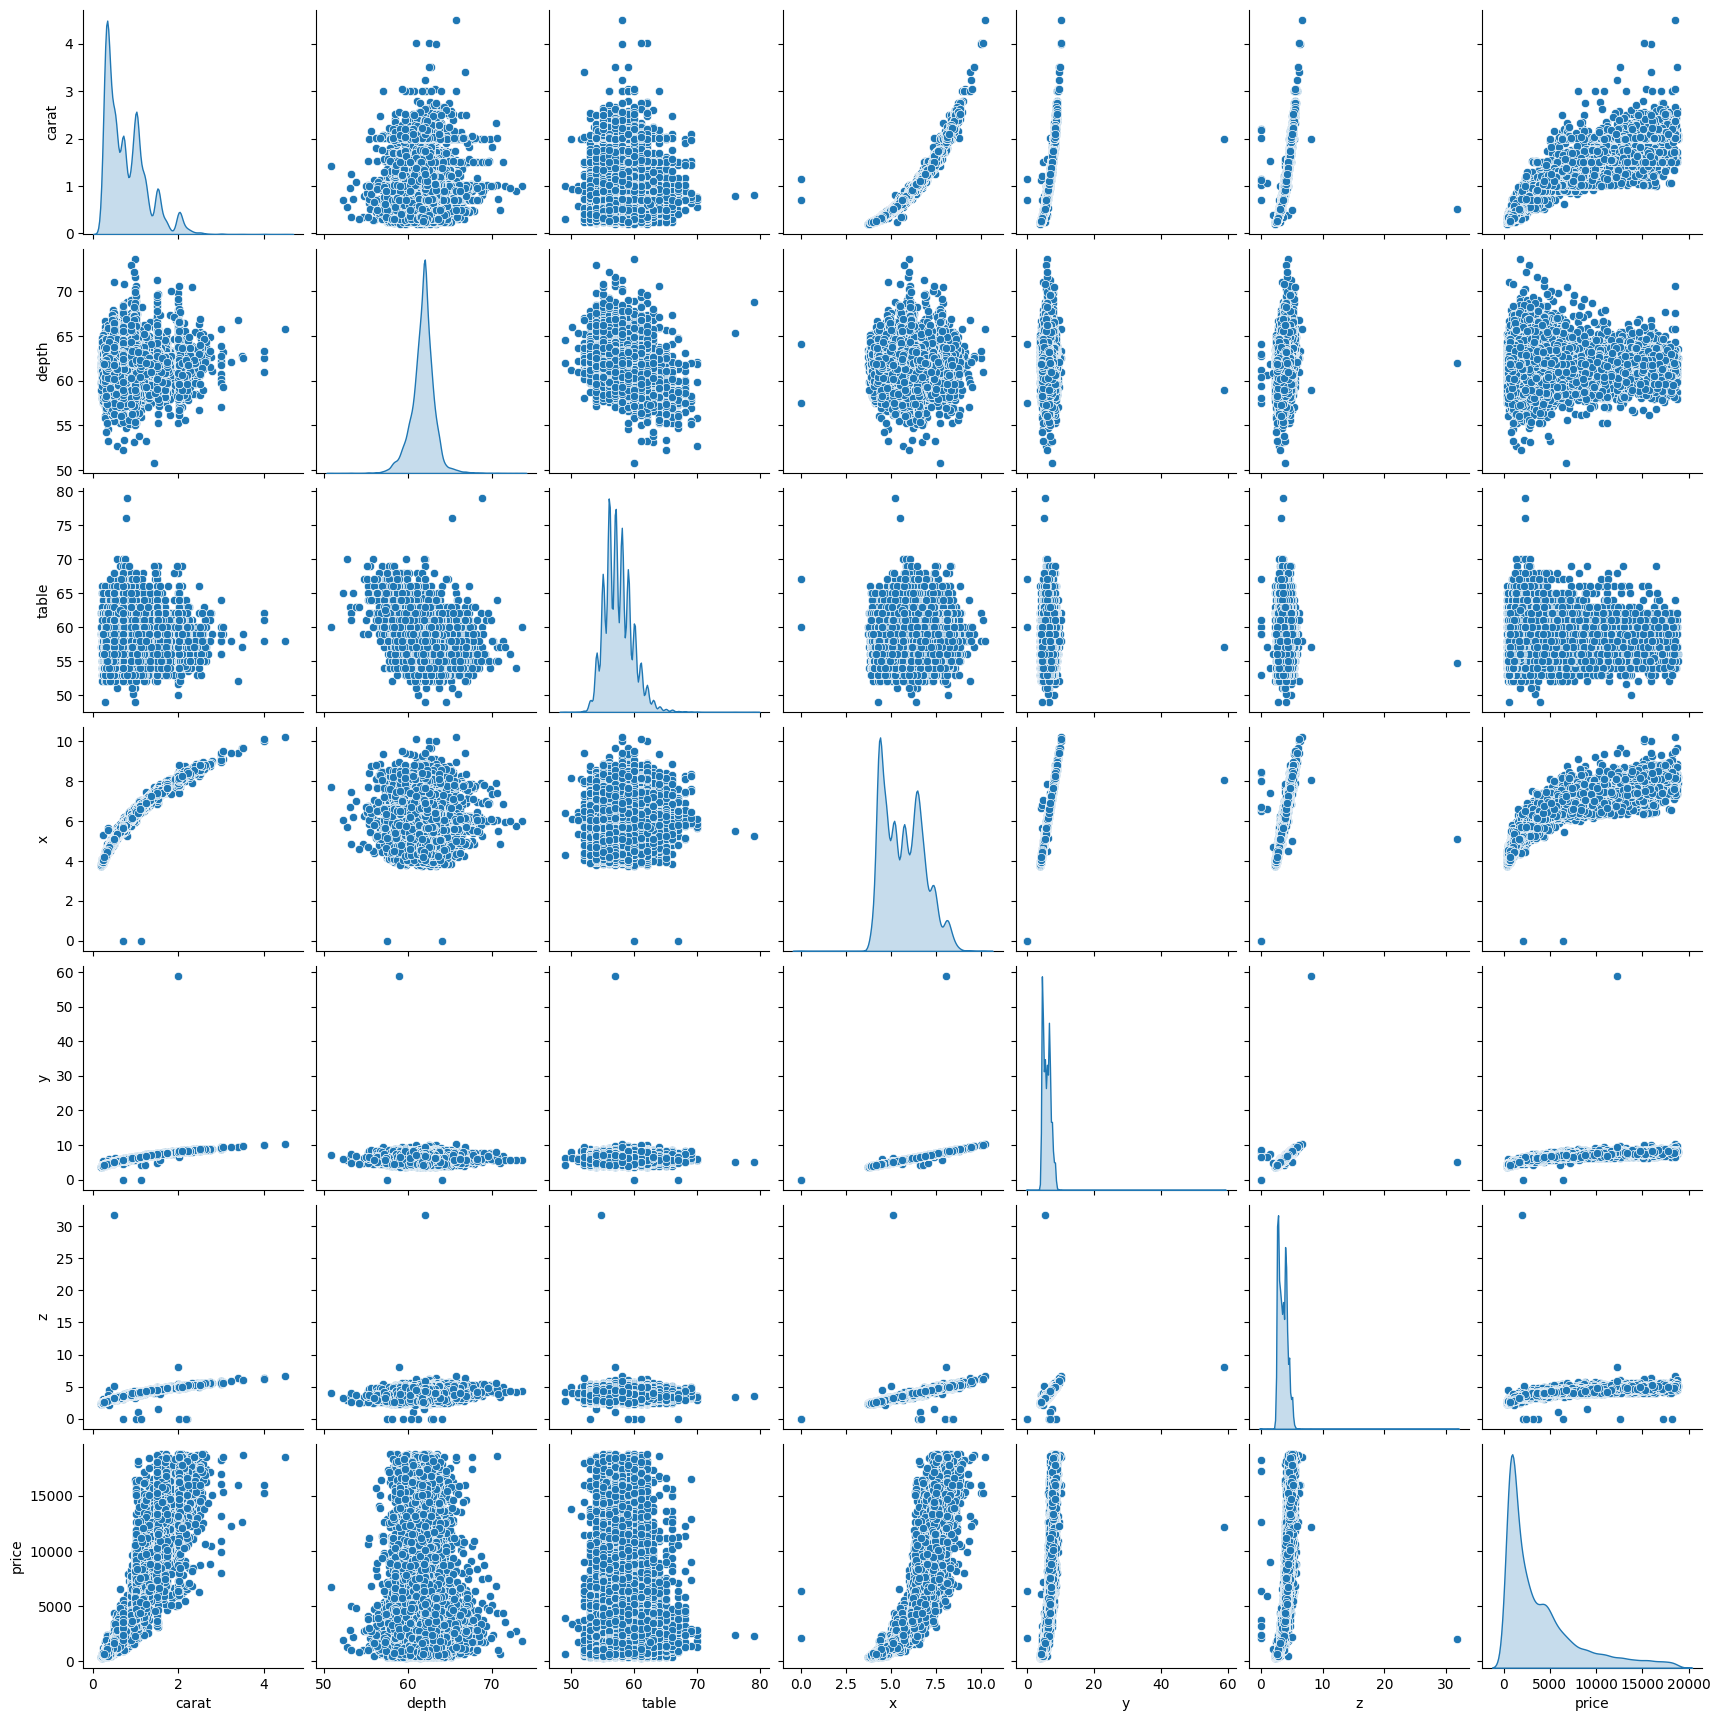

In [21]:
sns.pairplot(df,diag_kind='kde')
plt.show()

## Categorical Features vs Target Feature Price Boxplot

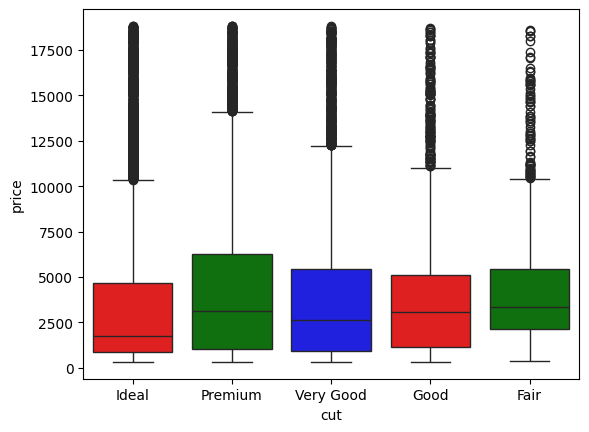

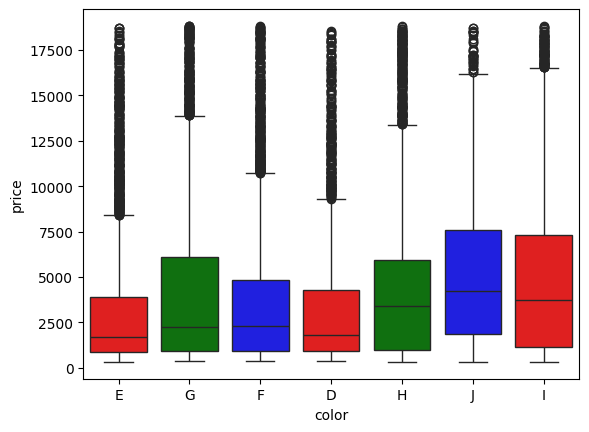

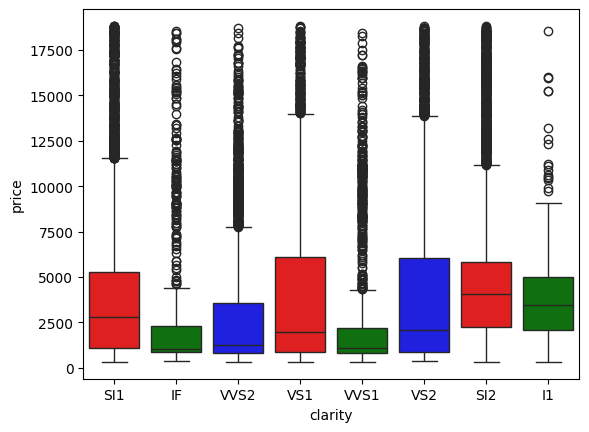

In [22]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i , y='price',palette=['red', 'green', 'blue'])
    plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ordinal Mapping of categorical features</p>

### It is observed that the categorical variables 'cut', 'color' and 'clarity' are ordinal in nature

### Check this link for details : [American Gem Society](https://www.americangemsociety.org/ags-diamond-grading-system/)

### Creating Mapper for each categorical variable

In [23]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

### Applying the mapper to the dataframe

In [24]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Mutual Information Scores</p>

### Seperating X and Y

In [26]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

### Calculating Mutual Information scores for regression

In [27]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [28]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

### Visualizing Mutual Information Scores

carat      1.851041
x          1.429266
y          1.427928
z          1.389133
clarity    0.324672
color      0.243908
cut        0.092089
table      0.048308
depth      0.029206
Name: MI Scores, dtype: float64


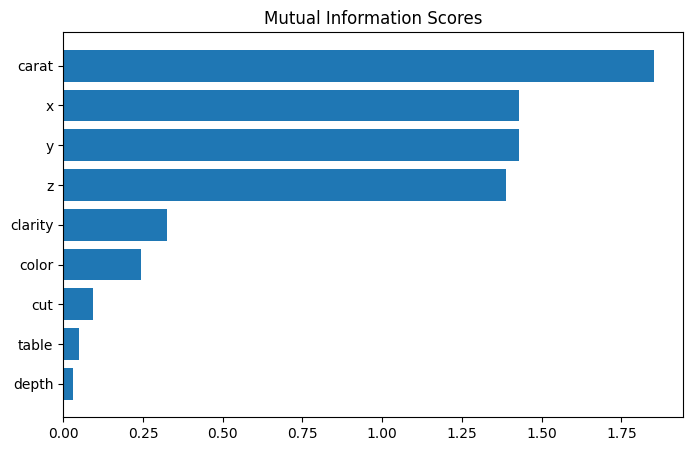

In [29]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### Conclusion : Above figure shows that the carat and dimensions(x, y, z) of gemstone are important features to predict the price of a gemstone